# Common Modeling Pitfalls: Mistakes That Make Network Models Unrealistic

This notebook demonstrates **common mistakes** in network models that make them unrealistic and unusable.

Understanding modeling pitfalls is essential because:
- **Pitfalls create gaps between model and reality** - models don't accurately represent the real network
- **Recommendations based on flawed models cannot be implemented** - they don't work in reality
- **Identifying pitfalls prevents failures** - catch problems before implementing recommendations
- **Recognizing pitfalls helps improve models** - fix problems to get better recommendations


## Key Concepts

**Common Modeling Pitfalls**:
- **Missing nodes or links**: Model doesn't include all relevant network elements
- **Unrealistic capacity assumptions**: Model assumes capacities that don't match reality
- **Incorrect cost assumptions**: Model uses wrong costs, leading to suboptimal recommendations
- **Time-dependent constraints ignored**: Model assumes constant constraints when they vary over time
- **Route availability ignored**: Model assumes all routes are always available

**Why Pitfalls Are Dangerous**:
- They create gaps between the model and reality
- Recommendations based on flawed models cannot be implemented
- Implementing impossible recommendations wastes time and resources
- They damage trust in analytics and network models

**Critical insight**: Understanding common pitfalls helps you identify problems in models before implementing recommendations. This prevents failures and helps improve model quality.


## Scenario: Transportation Network Model

A company uses a network model to optimize delivery routes. The model recommends specific routes, but some recommendations cannot be implemented.

**The Problem**:
- Model recommends routes that don't exist
- Model assumes capacities that are too high
- Model ignores that some routes are closed during certain times
- Model is missing a recently opened distribution center

**The Challenge**:
- How do you identify these pitfalls?
- What questions should you ask about the model?
- How do you fix the problems?

**The Question**: What pitfalls exist in this model? How do they affect recommendations?


## Step 1: Install Required Packages (Colab)


In [1]:
%pip install networkx matplotlib pandas -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries

The code below **imports** (loads) the libraries we need. You don't need to learn Python—just know what each library is for:

- **networkx**: Represents the **network** (nodes and links). We use it to build one graph that matches the **model** (what the optimizer thinks the network looks like) and another that matches **reality** (e.g., with an extra node or a closed route). Comparing the two highlights **modeling pitfalls**—gaps between model and reality.
- **matplotlib**: Draws **side-by-side diagrams** so we can compare "what the model assumes" vs "what is actually true." Visual comparison makes it easy to see missing nodes, wrong capacities, or unavailable routes.
- **pandas**: Builds **tables** (DataFrames) when we compare model assumptions to reality (e.g., assumed capacity vs actual capacity). Tables help us list and check each link or node systematically.

Run the cell to load these tools for the rest of the notebook.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10


## Step 3: Pitfall 1: Missing Nodes

A **modeling pitfall** is a mistake or simplification in how we build the network model that makes the model **not match reality**. When the model is wrong, the optimizer's recommendations can be wrong too—e.g., it might never use a facility that actually exists and is useful.

**Pitfall 1: Missing nodes.** The model's network might have been built from an old list of facilities. If a **new node** (e.g., a distribution center DC3) has opened in reality but was never added to the model, the model **does not know** that DC3 exists. So it will never recommend using DC3, and it might overuse or overload other nodes instead. In other words, the **solution is optimal for the wrong network**—one that is missing a real option.

**What the code does**: It builds two networks: one that represents **the model** (only DC1 and DC2) and one that represents **reality** (DC1, DC2, and DC3). It then draws them side by side so you can see the gap. The lesson: always ensure that every **relevant** facility (and link) in the real world is represented in the model; otherwise, recommendations will ignore real options and can be suboptimal or impossible to implement correctly.


PITFALL 1: MISSING NODE
Model network: Missing DC3 (recently opened)
  Model has 7 nodes
  Reality has 8 nodes
\n⚠️  PROBLEM: Model doesn't know about DC3
   Model cannot recommend using DC3
   Model might recommend longer routes when shorter ones exist


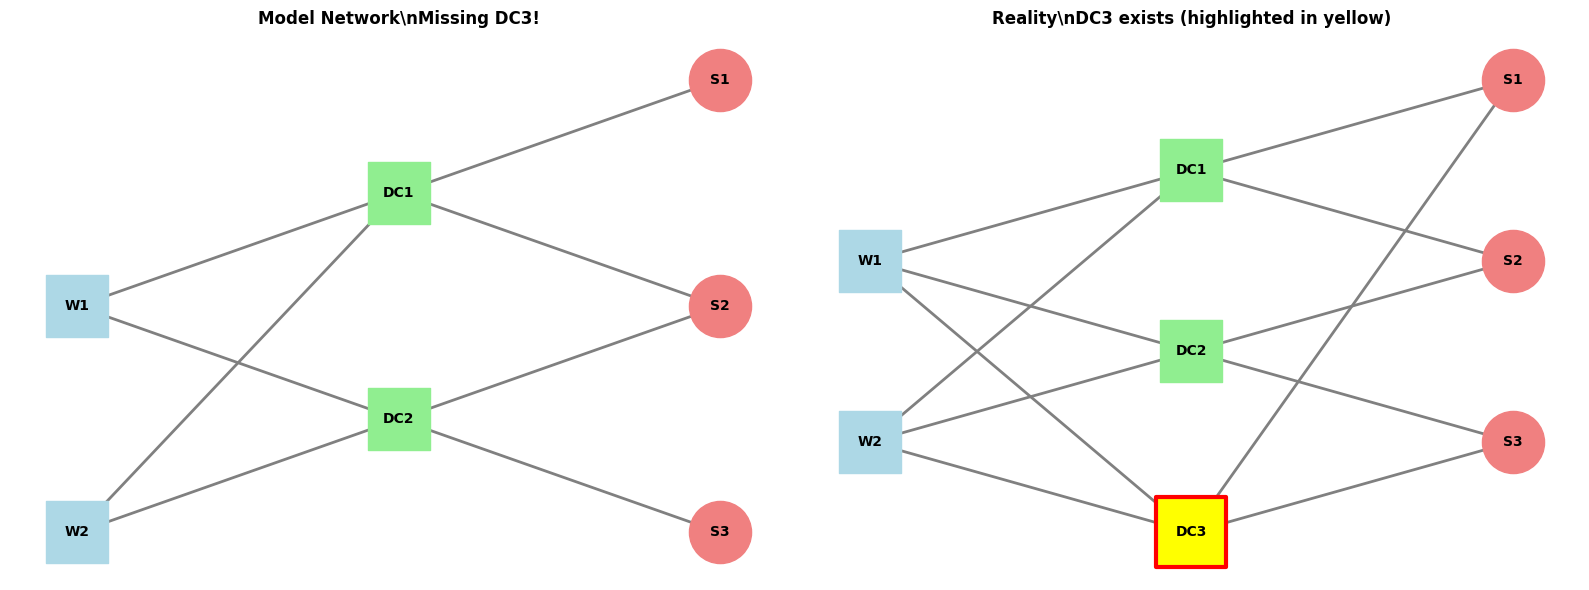

\nKey Insight:
  • Missing nodes mean model cannot use them
  • Model recommendations may be suboptimal
  • Always verify model includes all relevant nodes


In [3]:
# Model network (missing DC3)
G_model = nx.DiGraph()
G_model.add_nodes_from(['W1', 'W2', 'DC1', 'DC2', 'S1', 'S2', 'S3'])
G_model.add_edges_from([
    ('W1', 'DC1'), ('W1', 'DC2'),
    ('W2', 'DC1'), ('W2', 'DC2'),
    ('DC1', 'S1'), ('DC1', 'S2'),
    ('DC2', 'S2'), ('DC2', 'S3')
])

# Reality: DC3 was recently opened
G_reality = G_model.copy()
G_reality.add_node('DC3')
G_reality.add_edges_from([
    ('W1', 'DC3'), ('W2', 'DC3'),
    ('DC3', 'S1'), ('DC3', 'S3')
])

print("PITFALL 1: MISSING NODE")
print("=" * 60)
print("Model network: Missing DC3 (recently opened)")
print(f"  Model has {G_model.number_of_nodes()} nodes")
print(f"  Reality has {G_reality.number_of_nodes()} nodes")
print("\\n⚠️  PROBLEM: Model doesn't know about DC3")
print("   Model cannot recommend using DC3")
print("   Model might recommend longer routes when shorter ones exist")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

pos = {
    'W1': (0, 1), 'W2': (0, 0),
    'DC1': (1.5, 1.5), 'DC2': (1.5, 0.5),
    'DC3': (1.5, -0.5),  # Missing in model
    'S1': (3, 2), 'S2': (3, 1), 'S3': (3, 0)
}

# Model (missing DC3)
nx.draw_networkx_nodes(G_model, pos, nodelist=['W1', 'W2'], 
                      node_color='lightblue', node_size=2000, node_shape='s', ax=ax1)
nx.draw_networkx_nodes(G_model, pos, nodelist=['DC1', 'DC2'], 
                      node_color='lightgreen', node_size=2000, node_shape='s', ax=ax1)
nx.draw_networkx_nodes(G_model, pos, nodelist=['S1', 'S2', 'S3'], 
                      node_color='lightcoral', node_size=2000, node_shape='o', ax=ax1)
nx.draw_networkx_edges(G_model, pos, edge_color='gray', arrows=True, arrowsize=15, width=2, ax=ax1)
nx.draw_networkx_labels(G_model, pos, font_size=10, font_weight='bold', ax=ax1)
ax1.set_title('Model Network\\nMissing DC3!', fontweight='bold', fontsize=12)
ax1.axis('off')

# Reality (has DC3)
nx.draw_networkx_nodes(G_reality, pos, nodelist=['W1', 'W2'], 
                      node_color='lightblue', node_size=2000, node_shape='s', ax=ax2)
nx.draw_networkx_nodes(G_reality, pos, nodelist=['DC1', 'DC2'], 
                      node_color='lightgreen', node_size=2000, node_shape='s', ax=ax2)
nx.draw_networkx_nodes(G_reality, pos, nodelist=['DC3'], 
                      node_color='yellow', node_size=2500, node_shape='s', 
                      edgecolors='red', linewidths=3, ax=ax2)  # Highlight missing node
nx.draw_networkx_nodes(G_reality, pos, nodelist=['S1', 'S2', 'S3'], 
                      node_color='lightcoral', node_size=2000, node_shape='o', ax=ax2)
nx.draw_networkx_edges(G_reality, pos, edge_color='gray', arrows=True, arrowsize=15, width=2, ax=ax2)
nx.draw_networkx_labels(G_reality, pos, font_size=10, font_weight='bold', ax=ax2)
ax2.set_title('Reality\\nDC3 exists (highlighted in yellow)', fontweight='bold', fontsize=12)
ax2.axis('off')

plt.tight_layout()
plt.show()

print("\\nKey Insight:")
print("  • Missing nodes mean model cannot use them")
print("  • Model recommendations may be suboptimal")
print("  • Always verify model includes all relevant nodes")


## Step 4: Pitfall 2: Unrealistic Capacity Assumptions

**Pitfall 2: Unrealistic capacity assumptions.** In network models, **capacity** is the maximum flow a link (or node) can handle. If we set capacities in the model **higher** than what is actually possible in the real world, the optimizer may recommend sending more flow on a link than can physically be moved. The solution then looks fine in the model but is **infeasible** in reality—you cannot implement it without exceeding real limits.

**What the code does**: It compares **model capacities** (what the optimizer believes each link can carry) to **actual capacities** (what we assume is true in reality). When the model assumes a higher capacity than reality, the code highlights that link (e.g., in a table or on a diagram). The lesson: **verify that every capacity in the model matches (or is conservatively below) real-world limits.** Otherwise, recommendations may tell you to overload a link, leading to failed execution or the need to re-solve with correct data.


PITFALL 2: UNREALISTIC CAPACITY ASSUMPTIONS


,Route,Model_Capacity,Actual_Capacity,Difference,Overestimate_%
0,W1 → DC1,100,80,20,25.0
1,W1 → DC2,100,75,25,33.3
2,W2 → DC1,100,90,10,11.1
3,DC1 → S1,150,120,30,25.0


\n⚠️  PROBLEM: Model overestimates capacities
   Model might recommend flows that exceed actual capacity
   Recommendations cannot be implemented


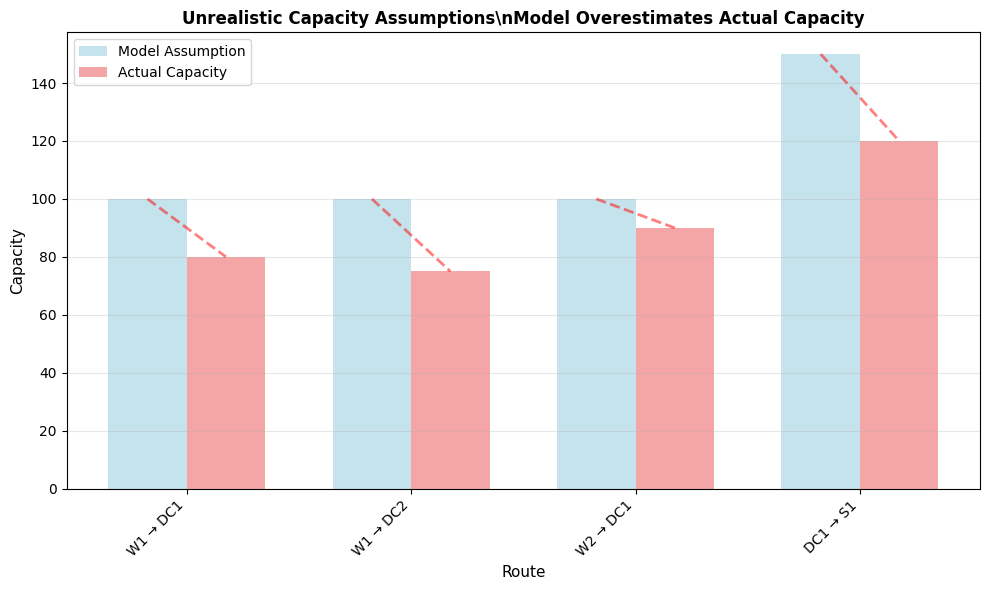

\nKey Insight:
  • Unrealistic capacities lead to impossible recommendations
  • Always verify capacity assumptions match reality
  • Model recommendations may exceed actual capacity


In [4]:
print("PITFALL 2: UNREALISTIC CAPACITY ASSUMPTIONS")
print("=" * 60)

# Model assumptions vs reality
capacity_data = {
    'Route': ['W1 → DC1', 'W1 → DC2', 'W2 → DC1', 'DC1 → S1'],
    'Model_Capacity': [100, 100, 100, 150],  # Model assumes
    'Actual_Capacity': [80, 75, 90, 120]    # Reality
}

capacity_df = pd.DataFrame(capacity_data)
capacity_df['Difference'] = capacity_df['Model_Capacity'] - capacity_df['Actual_Capacity']
capacity_df['Overestimate_%'] = (capacity_df['Difference'] / capacity_df['Actual_Capacity'] * 100).round(1)

display(capacity_df)

print("\\n⚠️  PROBLEM: Model overestimates capacities")
print("   Model might recommend flows that exceed actual capacity")
print("   Recommendations cannot be implemented")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

routes = capacity_df['Route'].values
x = np.arange(len(routes))
width = 0.35

bars1 = ax.bar(x - width/2, capacity_df['Model_Capacity'], width, 
              label='Model Assumption', color='lightblue', alpha=0.7)
bars2 = ax.bar(x + width/2, capacity_df['Actual_Capacity'], width, 
              label='Actual Capacity', color='lightcoral', alpha=0.7)

# Highlight overestimates
for i, (model_cap, actual_cap) in enumerate(zip(capacity_df['Model_Capacity'], capacity_df['Actual_Capacity'])):
    if model_cap > actual_cap:
        ax.plot([i - width/2, i + width/2], [model_cap, actual_cap], 
               'r--', linewidth=2, alpha=0.5)

ax.set_xlabel('Route', fontsize=11)
ax.set_ylabel('Capacity', fontsize=11)
ax.set_title('Unrealistic Capacity Assumptions\\nModel Overestimates Actual Capacity', 
            fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(routes, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\\nKey Insight:")
print("  • Unrealistic capacities lead to impossible recommendations")
print("  • Always verify capacity assumptions match reality")
print("  • Model recommendations may exceed actual capacity")


## Step 5: Pitfall 3: Time-Dependent Constraints Ignored

**Pitfall 3: Time-dependent constraints ignored.** Many network models use a **single capacity** (or a single set of parameters) for each link. In reality, **capacity or availability often varies over time**—e.g., rush hour reduces effective capacity, or a route is only open during certain shifts. If the model assumes constant capacity while reality varies, then the solution can be fine in some periods and **infeasible or suboptimal in others** (e.g., recommending flows that exceed capacity during rush hour).

**What the code does**: It compares a **model assumption** (constant capacity of 100 trucks per hour) to **actual capacity** in different time periods (e.g., lower during 6–9 AM and 6–9 PM). A table and a simple plot show where the model overestimates capacity. The lesson: **check whether constraints vary over time** (by time of day, season, or other factors). If they do, the model should reflect that—e.g., time-indexed capacities or separate models per period—so that recommendations are valid when they are applied.


PITFALL 3: TIME-DEPENDENT CONSTRAINTS IGNORED


,Time_Period,Model_Assumption,Actual_Capacity,Difference
0,6-9 AM,100,60,40
1,9-12 PM,100,100,0
2,12-3 PM,100,100,0
3,3-6 PM,100,80,20
4,6-9 PM,100,50,50


\n⚠️  PROBLEM: Model assumes constant capacity
   Model doesn't account for rush hour reductions
   Recommendations work at some times but not others


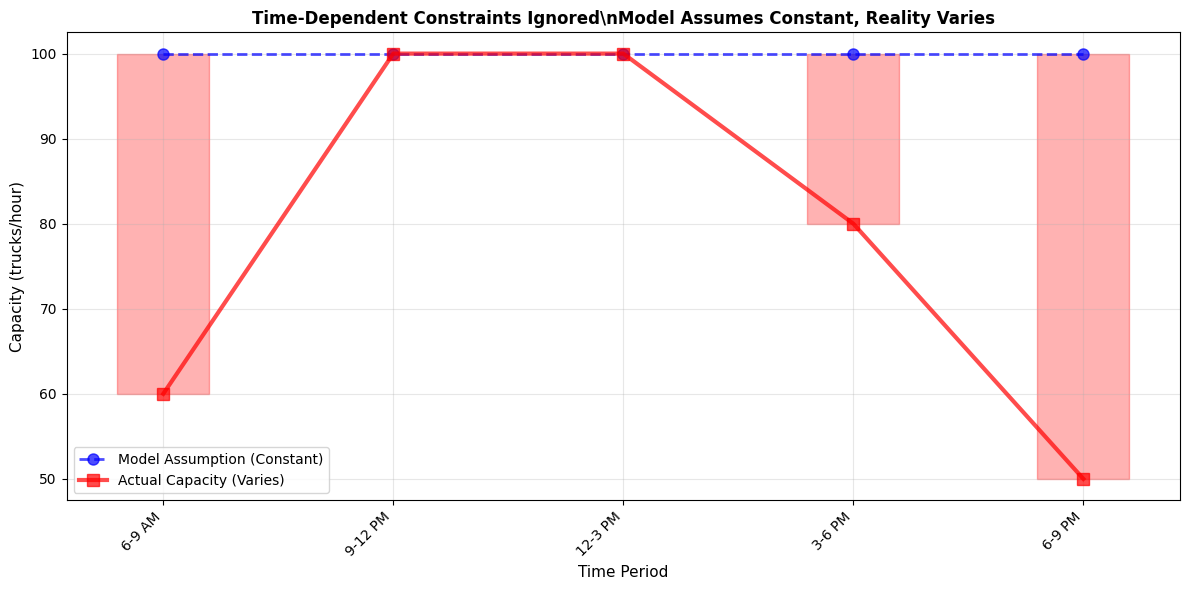

\nKey Insight:
  • Models that ignore time-dependent constraints are inaccurate
  • Recommendations may work at some times but fail at others
  • Always check if constraints vary over time


In [5]:
print("PITFALL 3: TIME-DEPENDENT CONSTRAINTS IGNORED")
print("=" * 60)

# Model assumes constant capacity
model_capacity = 100  # trucks per hour (constant)

# Reality: Capacity varies by time
time_periods = ['6-9 AM', '9-12 PM', '12-3 PM', '3-6 PM', '6-9 PM']
actual_capacities = [60, 100, 100, 80, 50]  # Rush hour reduces capacity

time_df = pd.DataFrame({
    'Time_Period': time_periods,
    'Model_Assumption': [model_capacity] * len(time_periods),
    'Actual_Capacity': actual_capacities,
    'Difference': [model_capacity - ac for ac in actual_capacities]
})

display(time_df)

print("\\n⚠️  PROBLEM: Model assumes constant capacity")
print("   Model doesn't account for rush hour reductions")
print("   Recommendations work at some times but not others")

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(time_periods))
ax.plot(x, time_df['Model_Assumption'], 'b--', linewidth=2, marker='o', 
       markersize=8, label='Model Assumption (Constant)', alpha=0.7)
ax.plot(x, time_df['Actual_Capacity'], 'r-', linewidth=3, marker='s', 
       markersize=8, label='Actual Capacity (Varies)', alpha=0.7)

# Highlight problem periods
for i, (model_cap, actual_cap) in enumerate(zip(time_df['Model_Assumption'], time_df['Actual_Capacity'])):
    if model_cap > actual_cap:
        ax.fill_between([i-0.2, i+0.2], [model_cap, model_cap], [actual_cap, actual_cap], 
                       color='red', alpha=0.3)

ax.set_xlabel('Time Period', fontsize=11)
ax.set_ylabel('Capacity (trucks/hour)', fontsize=11)
ax.set_title('Time-Dependent Constraints Ignored\\nModel Assumes Constant, Reality Varies', 
            fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(time_periods, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\\nKey Insight:")
print("  • Models that ignore time-dependent constraints are inaccurate")
print("  • Recommendations may work at some times but fail at others")
print("  • Always check if constraints vary over time")


## Step 6: Pitfall 4: Route Availability Ignored

**Pitfall 4: Route availability ignored.** The model might assume that **every link in the network is always open** for use. In reality, routes can be **temporarily unavailable** (e.g., road closed for construction, a lane out of service, or a partnership suspended). If the model still includes such a link as usable, the optimizer might recommend sending flow on a **closed route**—a recommendation that cannot be executed.

**What the code does**: It again compares **model** vs **reality**. The model network includes all routes as available; the "reality" network (or diagram) marks one route as **closed** (e.g., W1→DC1). The side-by-side view (and any red or dashed line for the closed route) shows that a solution that uses the closed link is invalid in reality. The lesson: **keep the model in sync with which routes are actually available.** If a route is closed, remove it from the model or set its capacity to zero for the relevant period; otherwise, recommendations may be impossible to follow.


PITFALL 4: ROUTE AVAILABILITY IGNORED
Model assumes:
  Available routes: [('W1', 'DC1'), ('W2', 'DC1'), ('DC1', 'S1'), ('DC1', 'S2')]
\nReality:
  Available routes: [('W2', 'DC1'), ('DC1', 'S1'), ('DC1', 'S2')]
\n⚠️  PROBLEM: Model recommends using W1 → DC1
   But this route is closed (construction)
   Recommendation cannot be implemented


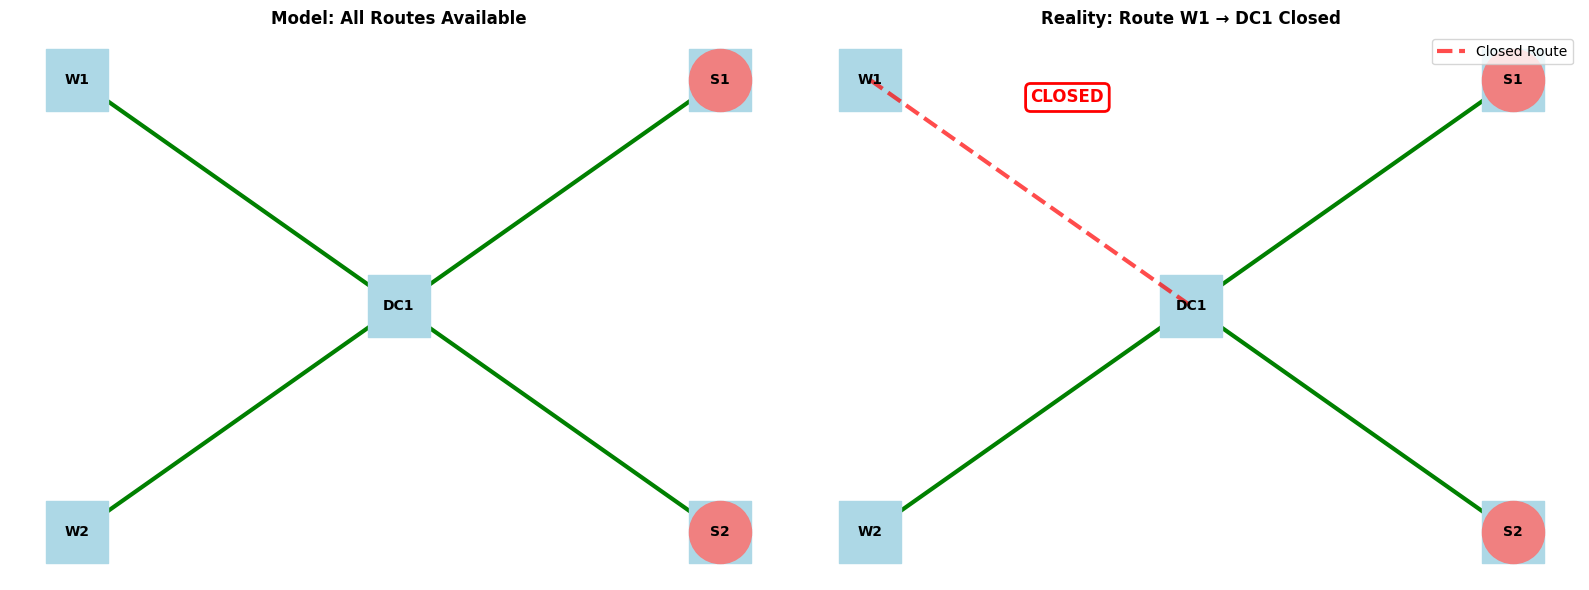

\nKey Insight:
  • Models that ignore route availability recommend impossible routes
  • Always check if routes are actually available
  • Weather, construction, and incidents can close routes


In [6]:
print("PITFALL 4: ROUTE AVAILABILITY IGNORED")
print("=" * 60)

# Model assumes all routes available
G_model_routes = nx.DiGraph()
G_model_routes.add_nodes_from(['W1', 'W2', 'DC1', 'S1', 'S2'])
G_model_routes.add_edges_from([
    ('W1', 'DC1'), ('W1', 'DC1'),  # Route 1
    ('W2', 'DC1'),                 # Route 2
    ('DC1', 'S1'), ('DC1', 'S2')   # Routes 3, 4
])

# Reality: Route W1 → DC1 is closed (construction)
G_reality_routes = G_model_routes.copy()
G_reality_routes.remove_edge('W1', 'DC1')

print("Model assumes:")
print(f"  Available routes: {list(G_model_routes.edges())}")
print("\\nReality:")
print(f"  Available routes: {list(G_reality_routes.edges())}")
print("\\n⚠️  PROBLEM: Model recommends using W1 → DC1")
print("   But this route is closed (construction)")
print("   Recommendation cannot be implemented")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

pos_routes = {
    'W1': (0, 1), 'W2': (0, 0),
    'DC1': (2, 0.5),
    'S1': (4, 1), 'S2': (4, 0)
}

# Model (all routes available)
nx.draw_networkx_nodes(G_model_routes, pos_routes, node_color='lightblue', 
                       node_size=2000, node_shape='s', ax=ax1)
nx.draw_networkx_nodes(G_model_routes, pos_routes, nodelist=['S1', 'S2'], 
                       node_color='lightcoral', node_size=2000, node_shape='o', ax=ax1)
nx.draw_networkx_edges(G_model_routes, pos_routes, edge_color='green', 
                      arrows=True, arrowsize=20, width=3, ax=ax1)
nx.draw_networkx_labels(G_model_routes, pos_routes, font_size=10, font_weight='bold', ax=ax1)
ax1.set_title('Model: All Routes Available', fontweight='bold', fontsize=12)
ax1.axis('off')

# Reality (route closed)
nx.draw_networkx_nodes(G_reality_routes, pos_routes, node_color='lightblue', 
                       node_size=2000, node_shape='s', ax=ax2)
nx.draw_networkx_nodes(G_reality_routes, pos_routes, nodelist=['S1', 'S2'], 
                       node_color='lightcoral', node_size=2000, node_shape='o', ax=ax2)
nx.draw_networkx_edges(G_reality_routes, pos_routes, edge_color='green', 
                      arrows=True, arrowsize=20, width=3, ax=ax2)
# Draw closed route in red
ax2.plot([pos_routes['W1'][0], pos_routes['DC1'][0]], 
        [pos_routes['W1'][1], pos_routes['DC1'][1]], 
        'r--', linewidth=3, alpha=0.7, label='Closed Route')
ax2.text((pos_routes['W1'][0] + pos_routes['DC1'][0])/2, 
        (pos_routes['W1'][1] + pos_routes['DC1'][1])/2 + 0.2,
        'CLOSED', fontsize=12, fontweight='bold', color='red', 
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='red', linewidth=2))
nx.draw_networkx_labels(G_reality_routes, pos_routes, font_size=10, font_weight='bold', ax=ax2)
ax2.set_title('Reality: Route W1 → DC1 Closed', fontweight='bold', fontsize=12)
ax2.axis('off')
ax2.legend()

plt.tight_layout()
plt.show()

print("\\nKey Insight:")
print("  • Models that ignore route availability recommend impossible routes")
print("  • Always check if routes are actually available")
print("  • Weather, construction, and incidents can close routes")


## Step 7: Key Takeaways

**What we mean by modeling pitfalls**:
- A **modeling pitfall** is a way the network model **diverges from reality**—missing or extra nodes/links, wrong capacities, or ignoring time or availability. When the model does not match reality, the optimizer finds the best solution **for the wrong problem**, so recommendations can be suboptimal, infeasible, or impossible to implement.
- **Four common pitfalls**: (1) **Missing nodes or links**—the model omits a real facility or route, so it never uses it. (2) **Unrealistic capacity assumptions**—the model allows more flow on a link than is actually possible, so the solution may recommend overloading that link. (3) **Time-dependent constraints ignored**—capacity or availability varies over time (e.g., by season or shift), but the model uses a single number, so recommendations can be wrong in some periods. (4) **Route availability ignored**—the model treats a route as open when it is actually closed (construction, outage, etc.), so the solution may use an unavailable route.

**Why these pitfalls are dangerous**:
- They create a **gap between model and reality**. The bigger the gap, the less you can trust the solution. Recommendations based on flawed models may be impossible to execute (e.g., send flow on a closed route or exceed real capacity), or they may miss better options (e.g., never use a new DC). Implementing such recommendations wastes resources and can damage credibility in analytics.

**How to identify and fix pitfalls**:
- **Nodes and links**: Regularly check that the model includes every relevant facility and route. When new locations or partnerships go live, add them to the model; when they are discontinued, remove them.
- **Capacities**: Verify that every capacity in the model matches (or is conservatively below) what is actually possible. Use real data or conservative estimates; avoid placeholder or outdated values.
- **Time and availability**: If capacities or route availability change over time (e.g., by day or season), the model should reflect that—e.g., different parameters per period or a time-indexed model—so that recommendations are valid for the period you are planning.
- **Route availability**: Before trusting a solution, confirm that every route the solution uses is actually available in the planning window. If a route is closed, update the model (remove the link or set capacity to zero) and re-solve.

**Building better network models over time**:
- Treat the model as a **living representation** of the network. As reality changes (new nodes, new links, capacity changes, closures), update the model. Use checklists or audits to compare model assumptions to reality (nodes, links, capacities, availability) before each major use. Evaluating model quality and fixing pitfalls before implementation leads to reliable recommendations and builds trust in prescriptive analytics.
